In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Paso 1: Cargar el Audio
Primero, necesitamos cargar el archivo de audio. Utilizaremos librosa para esta tarea.


In [ ]:

# Cargar el archivo de audio
file_path = 'DoMayor_trombone.wav'
y, sr = librosa.load(file_path, sr=None)

print(f"Frecuencia de muestreo: {sr}")
print(f"Forma de la señal: {y.shape}")


Frecuencia de muestreo: 44100
Forma de la señal: (584704,)


In [ ]:
# Escuchamos el audio
ipd.Audio(file_path)

# Paso 2: Normalización
 La normalización es importante para asegurar que los valores de la señal estén en un rango específico (normalmente entre -1 y 1).

In [ ]:
import numpy as np

# Normalizar la señal
y_normalized = librosa.util.normalize(y)

print(f"Forma de la señal normalizada: {y_normalized.shape}")


Forma de la señal normalizada: (584704,)


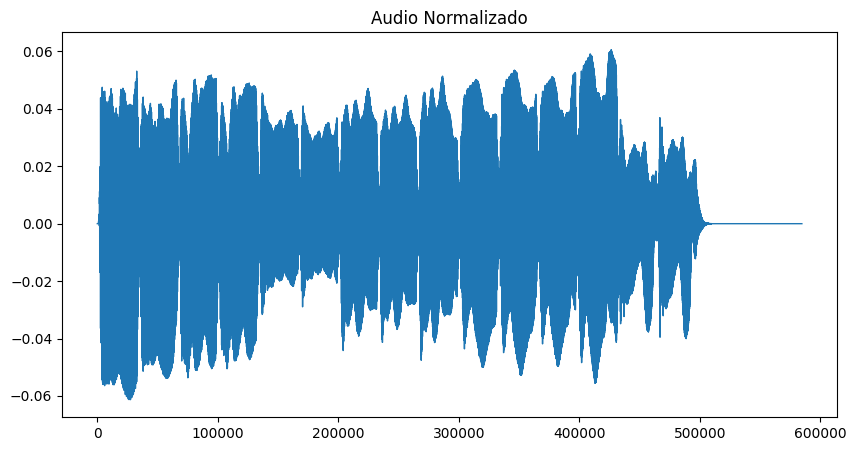

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Graficar la señal normalizada
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Normalizado',
                  color=color_pal[0])
plt.show()


# Paso 3: Eliminación de Silencio
Eliminamos los silencios al inicio y al final de la señal de audio para centrarnos en la parte relevante del audio.

In [ ]:
# Eliminar silencios
y_trimmed, _ = librosa.effects.trim(y_normalized)

print(f"Forma de la señal sin silencios: {y_trimmed.shape}")


Forma de la señal sin silencios: (509440,)


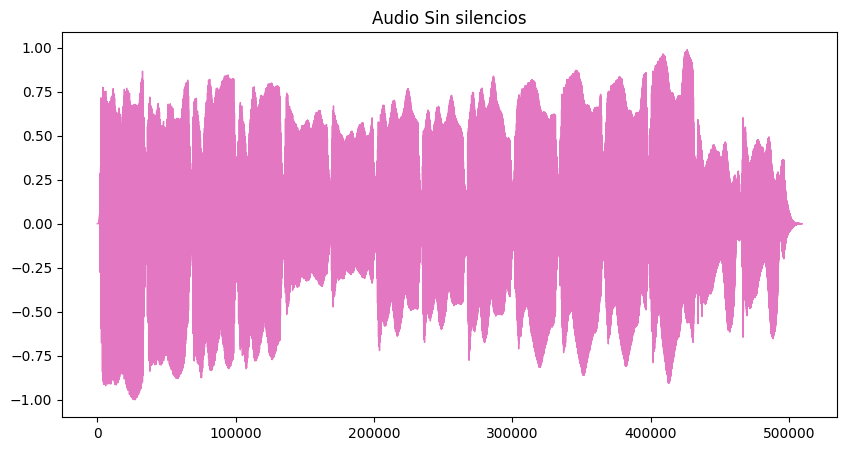

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Graficar la señal normalizada
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Sin silencios',
                  color=color_pal[6])
plt.show()

# Paso 4: Extracción de Características

### Hop lenght y ventana:



hop_length: La cantidad de muestras entre inicios de ventanas consecutivas, que aquí es 512.
n_fft: El tamaño de la ventana, que aquí es 2048.
Convertir estas cantidades a segundos:

hop_length_duration: Convierte hop_length de muestras a segundos dividiéndolo por la frecuencia de muestreo sr.
n_fft_duration: Convierte n_fft de muestras a segundos dividiéndolo por la frecuencia de muestreo sr.

## 0. Power Spectrum- Fourier transform (FTT)

La Transformada de Fourier es una herramienta matemática que descompone una señal en sus componentes de frecuencia. En términos simples, toma una función en el dominio del tiempo (como una onda sonora) y la convierte en una representación en el dominio de la frecuencia, mostrando qué frecuencias están presentes y en qué amplitudes. Esta transformación es fundamental en el procesamiento de señales, permitiendo analizar la frecuencia de los componentes de una señal de manera detallada.

Forma de la Transformada de Fourier: (509440,)


Text(0.5, 1.0, 'Power spectrum')

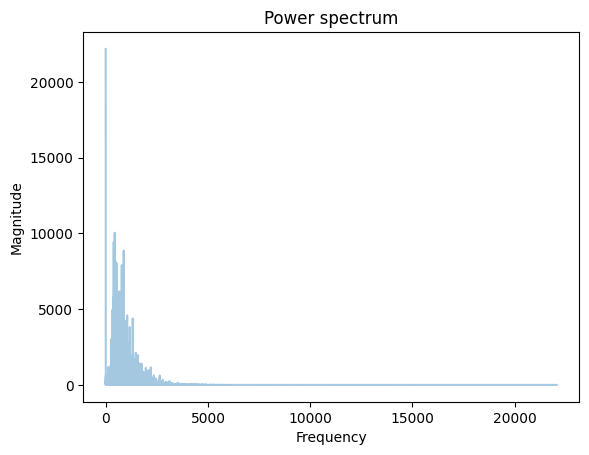

In [ ]:
# perform Fourier transform
fft = np.fft.fft(y_trimmed)

print(f"Forma de la Transformada de Fourier: {fft.shape}")

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sr, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure()
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

### STFT

En este caso, se está utilizando la STFT para obtener una representación de la señal en el dominio tiempo-frecuencia. La STFT divide la señal y_trimmed en segmentos (ventanas) de tamaño n_fft y aplica la FFT a cada segmento. Luego se desplaza por la señal con un paso de hop_length para aplicar la FFT en la siguiente ventana.


D.shape será (n_fft/2+1, num_frames), donde num_frames es el número de ventanas que se pueden ajustar en la señal con el hop_length dado.
librosa.stft devuelve una matriz de magnitudes en la que las filas corresponden a las frecuencias y las columnas corresponden a las ventanas de tiempo.

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y_trimmed, n_fft = n_fft, hop_length = hop_length))
print(f"Forma del objeto D: {D.shape}")

Forma del objeto D: (1025, 996)


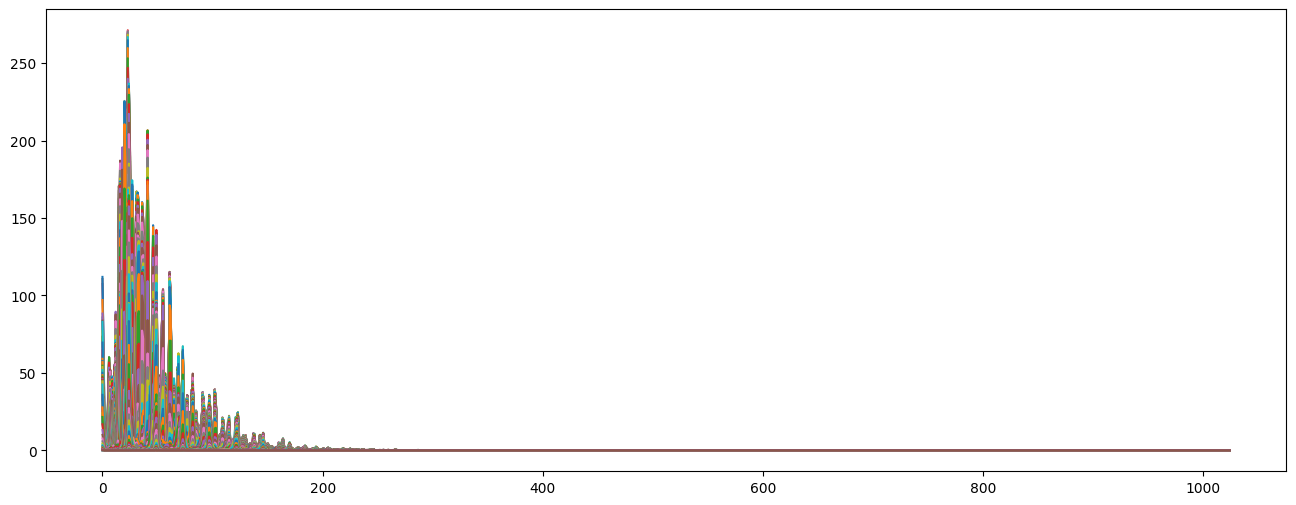

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

### Diferencias entre FTT y STFT


FFT: Aplica la transformación a toda la señal a la vez, dando un solo espectro de frecuencia. El resultado tiene la misma longitud que la señal original.

STFT: Aplica la transformación en ventanas de la señal, proporcionando una representación tiempo-frecuencia. El resultado es una matriz donde cada columna representa el espectro de una ventana de tiempo.

Por lo tanto, las formas de los resultados son diferentes porque una representa todo el espectro de la señal completa (FFT) y la otra representa el espectro en ventanas de tiempo sucesivas (STFT).

## 1. MFCC (Mel Frequency Cepstral Coefficients):

Descripción: Capturan las características de la envolvente del espectro de potencia del audio, imitando la percepción humana del sonido.

Usos: Ampliamente utilizados en el reconocimiento de voz y clasificación de géneros musicales.

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


In [ ]:
mfcc = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
print(f"MFCC: {mfcc.shape}")

MFCC: (13, 996)


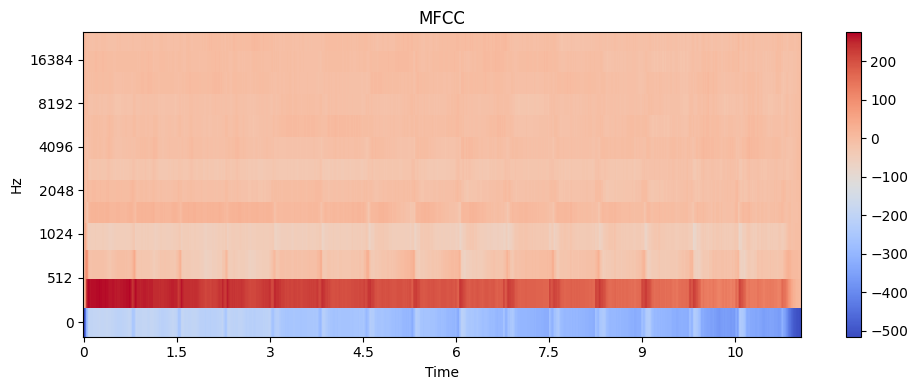

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


## 2: Chroma:

Descripción: Representa la energía de cada una de las 12 notas de la escala musical en cada frame de audio.

Usos: Comúnmente utilizados en la identificación de acordes y detección de tonalidades.

In [ ]:
chroma = librosa.feature.chroma_stft(y=y_trimmed, sr=sr)
print(f"Chroma: {chroma.shape}")


Chroma: (12, 996)


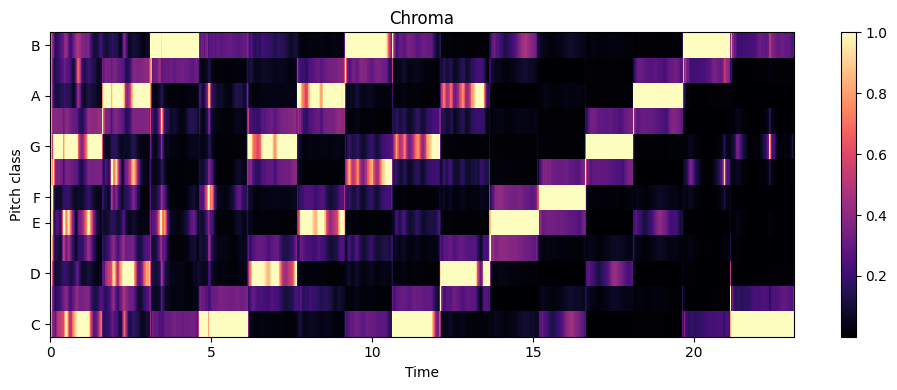

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()


## 3.Spectrograma:

Descripción: Muestra cómo la energía de diferentes frecuencias cambia a lo largo del tiempo.

Usos: Utilizados en la visualización y análisis del contenido de frecuencia del audio, así como en la detección de eventos sonoros y clasificación de sonidos ambientales.

In [ ]:
# perform stft
stft = librosa.stft(y_trimmed, n_fft=n_fft, hop_length=hop_length)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs((stft))

# otra forma de hacer lo mismo en una sola linea:
# spectrogram = np.abs(librosa.stft(y_trimmed))
print(f"Spectrograma: {spectrogram.shape}")


Spectrograma: (1025, 996)


Text(0.5, 1.0, 'Linear Spectrogram')

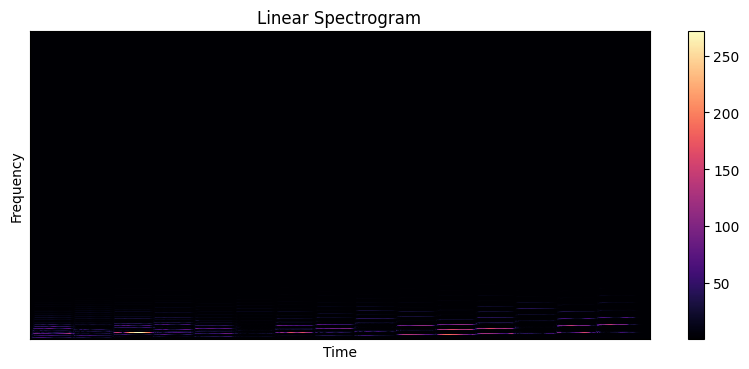

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Linear Spectrogram")

Observamos que al no aplicar la funcion logarítmica el grafico no sirve para observar de manera adecuada la magnitud de las frecuencias posibles de ser escuchadas.

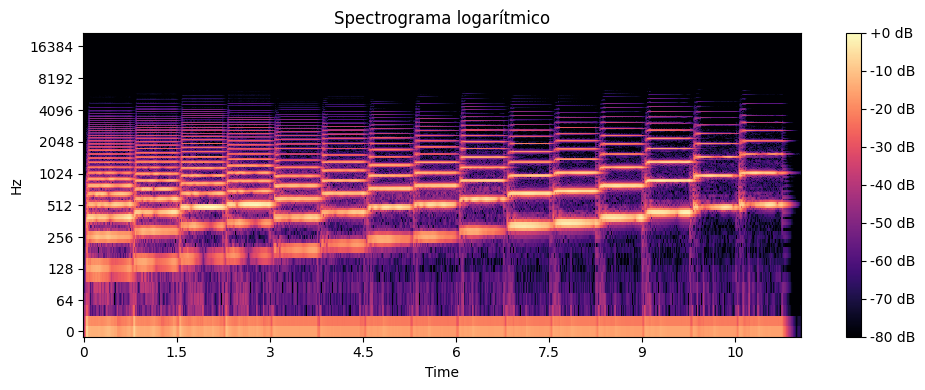

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, hop_length=hop_length, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrograma logarítmico')
plt.tight_layout()
plt.show()


## 3.1 Mel Spectogram:

Un espectrograma de Mel es una representación visual de un espectro de frecuencias de una señal de audio en función del tiempo, utilizando la escala Mel. La escala Mel es una escala perceptual de frecuencias que refleja cómo los humanos perciben el tono, siendo más sensible a las frecuencias bajas que a las altas. En un espectrograma de Mel, las frecuencias se distribuyen no linealmente para alinearse mejor con la percepción auditiva humana. Esto es útil en tareas de procesamiento de audio y reconocimiento de patrones, como en el reconocimiento de voz y la música.

Mel filter banks:

In [ ]:
#creamos un filter bank de 10 mel bands
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

(10, 1025)

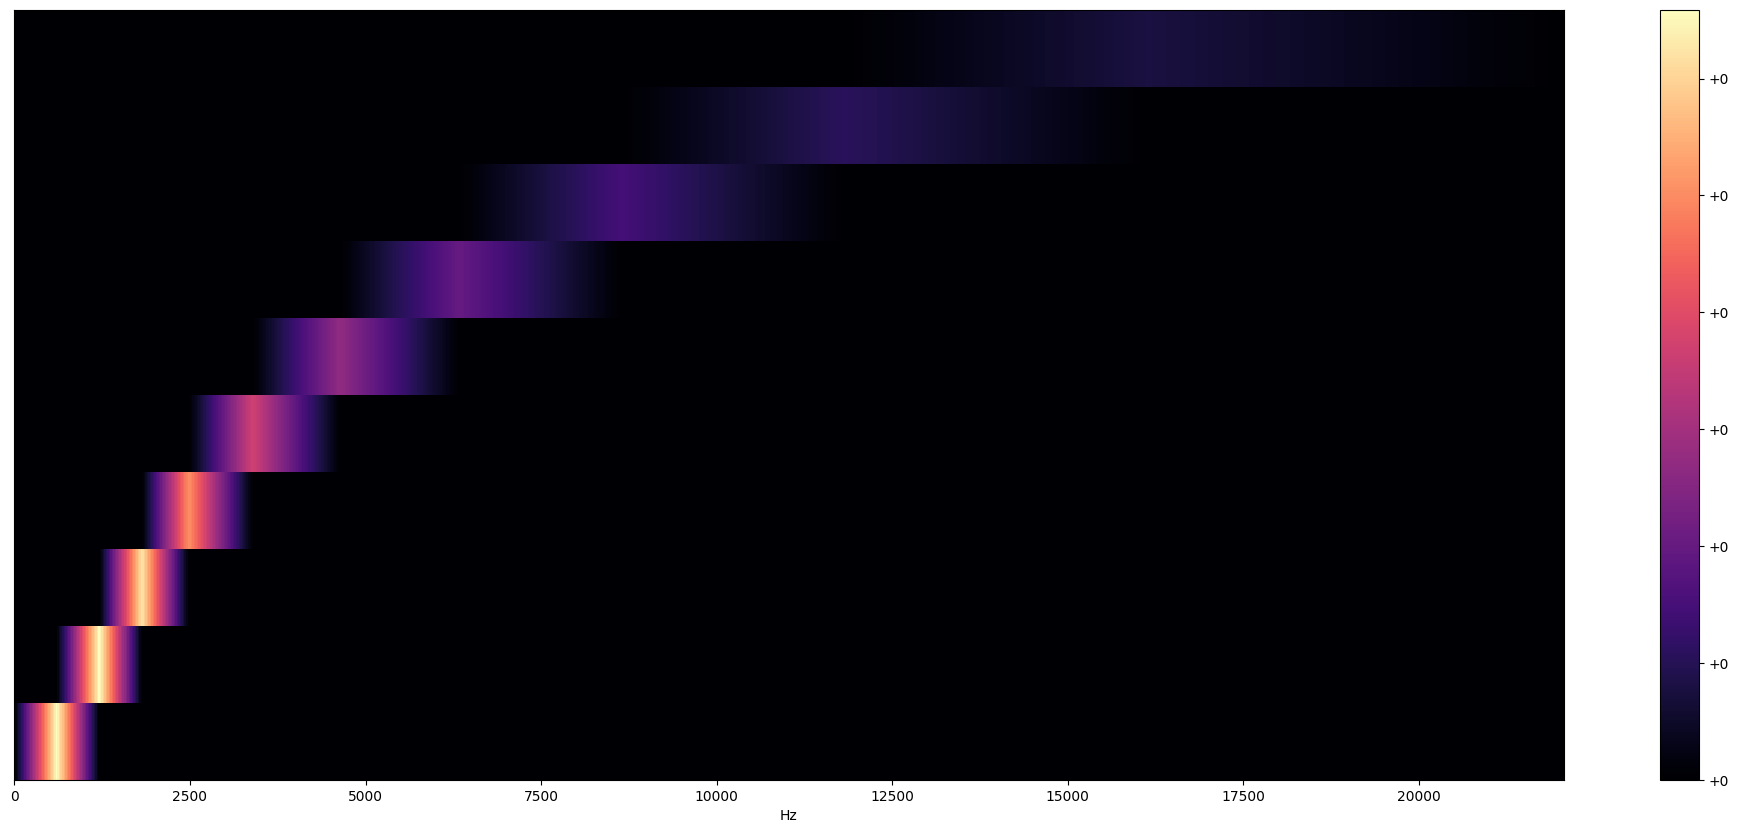

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

Mel Spectrogram:

In [ ]:
# mel spectogram con 90 bandas
mel_spectrogram = librosa.feature.melspectrogram(y=y_trimmed, sr=sr, n_fft=2048, hop_length=512, n_mels=50)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

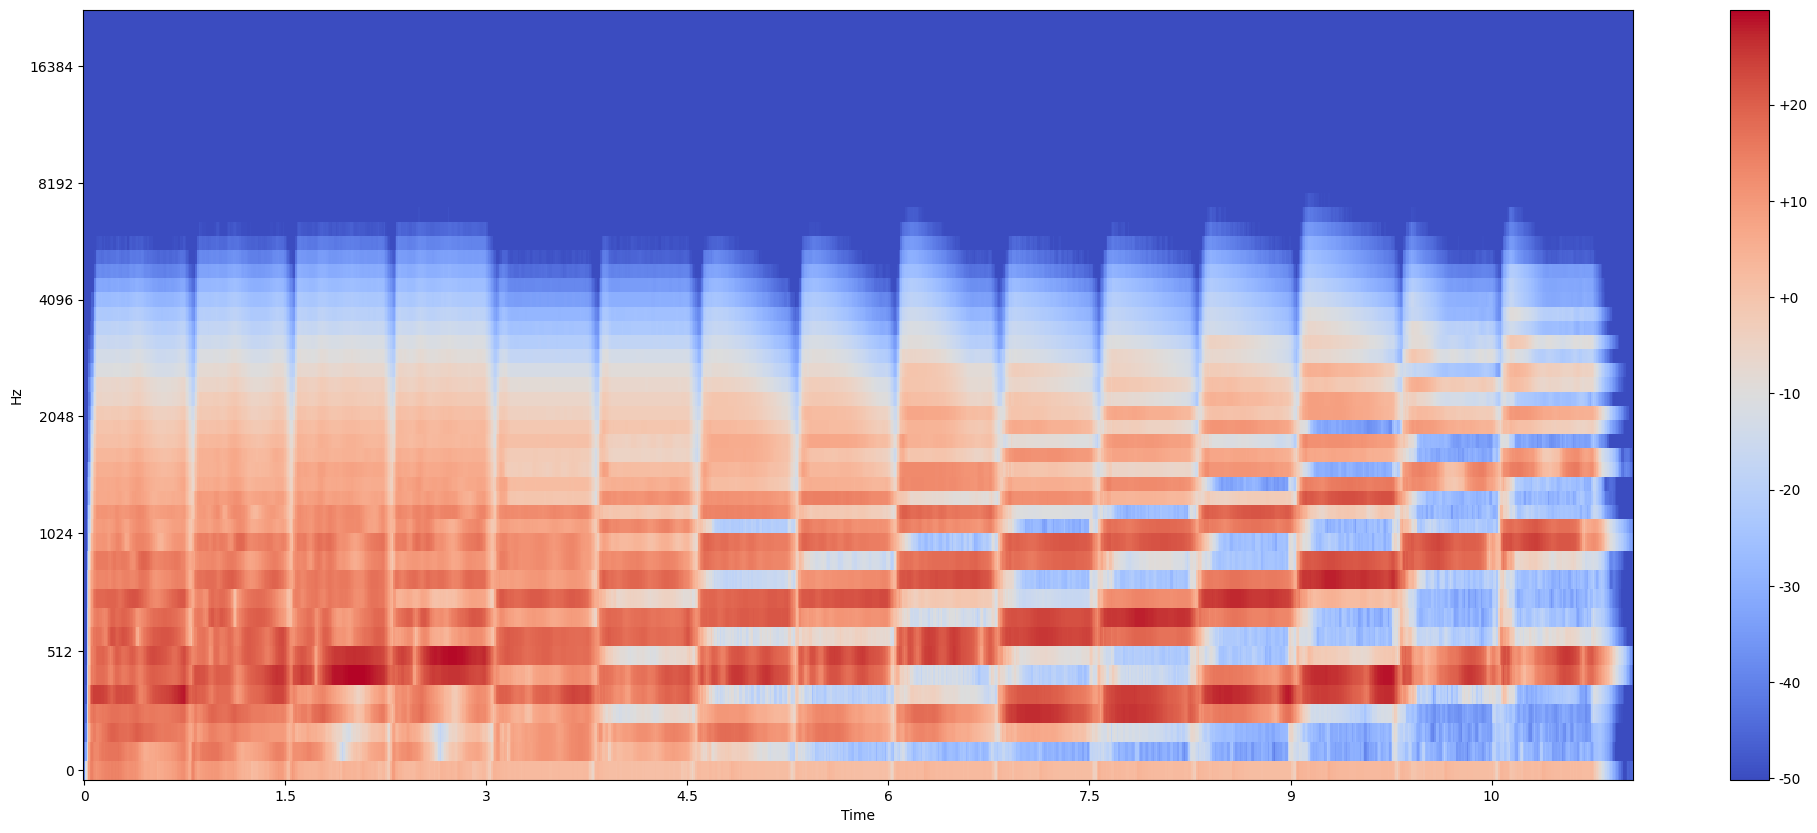

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## 4. Amplitud Envelope:

Descripción: Representa la envolvente de amplitud, o el contorno de amplitud, del audio en el tiempo.

Usos: Útil para la detección de ataques en instrumentos musicales y segmentación de eventos de audio.

In [ ]:
amplitude_envelope = np.max(librosa.util.frame(y_trimmed, frame_length=1024, hop_length=512), axis=0)
print(f"Amplitud Envelope: {amplitude_envelope.shape}")


Amplitud Envelope: (994,)


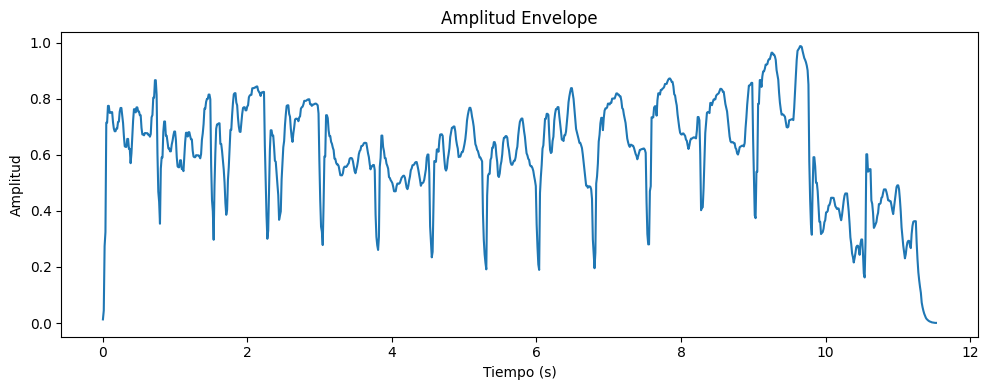

In [ ]:
frames = range(len(amplitude_envelope))
t = librosa.frames_to_time(frames, sr=sr, hop_length=512)

plt.figure(figsize=(10, 4))
plt.plot(t, amplitude_envelope, label='Amplitud Envelope')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Amplitud Envelope')
plt.tight_layout()
plt.show()


## 5. Spectral Centroid:

Descripción: Indica el "centro de masa" del espectro de frecuencias, asociado con la percepción del brillo del sonido.

Usos: Utilizado en la clasificación de instrumentos y diferenciación de voces.

In [ ]:
spectral_centroid = librosa.feature.spectral_centroid(y=y_trimmed, sr=sr)
print(f"Spectral Centroid: {spectral_centroid.shape}")


Spectral Centroid: (1, 996)


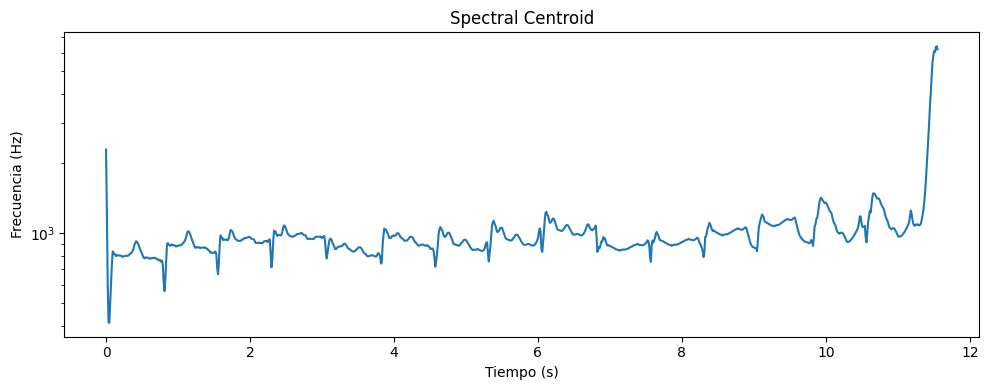

In [ ]:
frames = range(len(spectral_centroid[0]))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(10, 4))
plt.semilogy(t, spectral_centroid[0], label='Spectral Centroid')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Spectral Centroid')
plt.tight_layout()
plt.show()


## 6. Zero-Crossing Rate:

Descripción: Cuenta cuántas veces la señal cruza por cero, indicando la cantidad de cambios de signo en la onda sonora.

Usos: Comúnmente utilizado en la clasificación de sonidos impulsivos y en la distinción entre voz y música.

In [ ]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y_trimmed)
print(f"Zero-Crossing Rate: {zero_crossing_rate.shape}")



Zero-Crossing Rate: (1, 996)


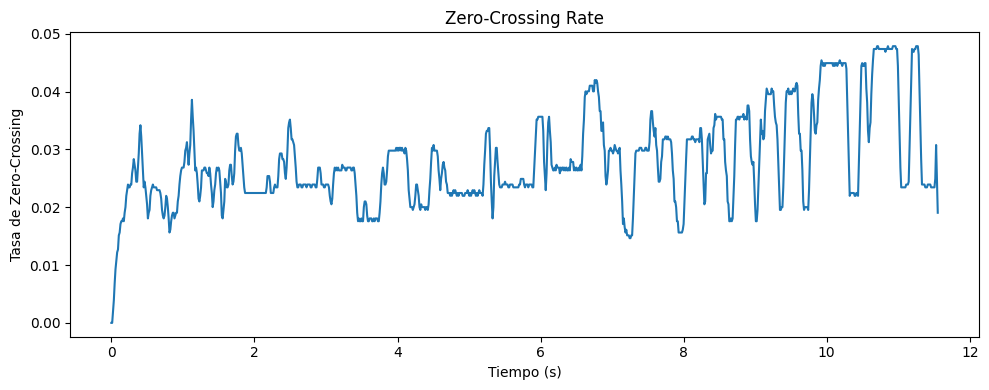

In [ ]:
frames = range(len(zero_crossing_rate[0]))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(10, 4))
plt.plot(t, zero_crossing_rate[0], label='Zero-Crossing Rate')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de Zero-Crossing')
plt.title('Zero-Crossing Rate')
plt.tight_layout()
plt.show()


## 7. Spectral Flux:

Descripción: Mide el cambio en el espectro de energía entre frames sucesivos del audio.

Usos: Utilizado en la detección de transitorios y en la segmentación de eventos de audio.

In [ ]:
spectral_flux = np.sqrt(np.mean(np.diff(np.abs(librosa.stft(y_trimmed)), axis=1)**2, axis=0))
print(f"Spectral Flux: {spectral_flux.shape}")


Spectral Flux: (995,)


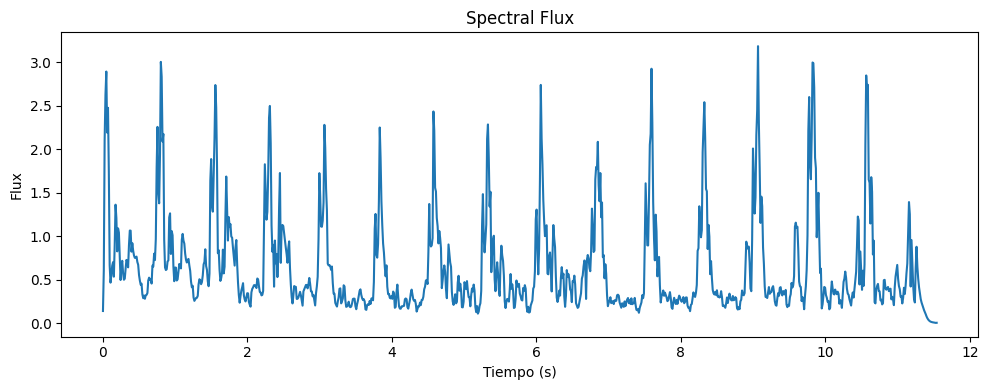

In [ ]:
frames = range(len(spectral_flux))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(10, 4))
plt.plot(t, spectral_flux, label='Spectral Flux')
plt.xlabel('Tiempo (s)')
plt.ylabel('Flux')
plt.title('Spectral Flux')
plt.tight_layout()
plt.show()


## Harmonics and Perceptrual
Harmonics are characteristichs that human years can't distinguish (represents the sound color)
Perceptrual understanding shock wave represents the sound rhythm and emotion

Harmonics: (509440,)
Perceptrual: (509440,)


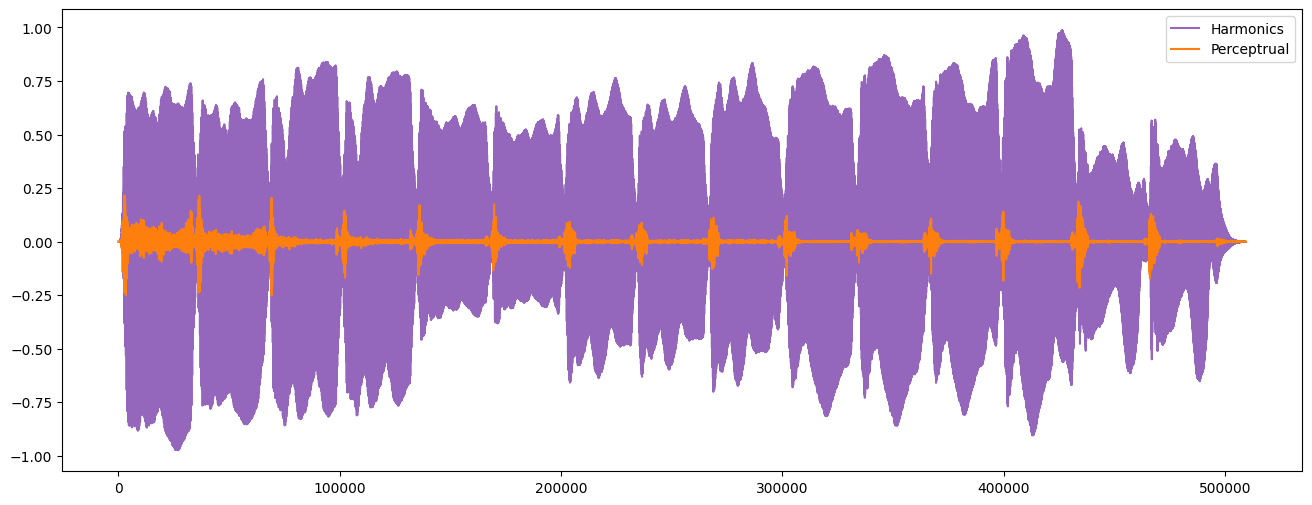

In [ ]:
y_harm, y_perc = librosa.effects.hpss(y_trimmed)

print(f"Harmonics: {y_harm.shape}")
print(f"Perceptrual: {y_perc.shape}")

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color=color_pal[4]);
plt.plot(y_perc,color=color_pal[1]);
plt.legend(['Harmonics', 'Perceptrual'])
plt.show()